**Objetivo: Tratar os dados de avaliação positiva e negativa para melhora do produto automaticamente sem precisar verificar um por um.**

*Bibliotecas: pandas, scikit-learn, wordcloud, matplotlib, nltk, unidecode*

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset_avaliacoes.csv')
df.head(5)

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [3]:
df.shape

(15501, 4)

In [4]:
#Mudar para 1 e 0
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [5]:
#Sentimento possitivo
df.avaliacao[0]

'Esse smartphone superou minhas expectativas, recomendo'

In [6]:
#Sentimento negativa
df.avaliacao[2]

'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.'

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']
vetorizar= CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [8]:
#sparse.from_spmatrix() para converter a matriz esparsa para o formato de dataframe. columns=vetorizar.get_feature_names_out() para capturar o nome das palavras. get_feature_names_out() serve para obter os nomes das palavras presentes na matriz.
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns=vetorizar.get_feature_names_out())
matriz_esparsa

comprei  produto  ruim  um  ótimo
0        1        1     0   1      1
1        1        1     1   1      0

Na primeira frase, "comprei" atribui o valor 1, pois a palavra está presente. "Produto" também recebe 1, enquanto "ruim" recebe 0, pois não está presente. Para "ótimo", o valor é 1. Na segunda frase, "comprei", "produto" e "ruim" recebem 1, enquanto "ótimo" recebe 0.

In [9]:
vetorizar = CountVectorizer(lowercase=False)#não mudar altomaticamente para lower ou upper
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 23352)


In [10]:
#Limitar featuers
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 50)


In [11]:
matriz_esparsa_avaliacao = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa_avaliacao


Não  Produto  ainda  antes  as  até  bem  bom  chegou  com  ...  \
0        0        0      0      0   0    0    0    0       0    0  ...   
1        0        0      0      0   0    0    0    0       0    0  ...   
2        0        0      0      0   0    0    0    0       0    0  ...   
3        0        0      0      0   0    0    0    0       0    0  ...   
4        0        0      0      0   0    0    1    0       0    0  ...   
...    ...      ...    ...    ...  ..  ...  ...  ...     ...  ...  ...   
15496    0        0      0      0   0    0    0    0       0    0  ...   
15497    0        0      0      0   0    0    0    0       0    0  ...   
15498    0        0      0      0   0    0    0    0       0    0  ...   
15499    0        1      0      1   0    0    0    1       1    0  ...   
15500    0        0      0      0   0    0    0    0       0    0  ...   

       qualidade  que  recebi  recomendo  se  sem  tem  um  uma  veio  
0              0    0       0          1   0    0    0   0    0     0  
1              0    0       0          0   1    0    0   0    0     0  
2              0    0       0          0   0    0    0   0    0     0  
3              0    1       0          0   0    0    0   0    0     0  
4              1    2       0          0   0    0    0   0    0     0  
...          ...  ...     ...        ...  ..  ...  ...  ..  ...   ...  
15496          0    0       0          1   0    0    0   0    0     0  
15497          0    1       0          0   0    0    1   0    0     0  
15498          0    0       0          0   0    0    0   1    0     0  
15499          0    0       0          0   0    0    0   0    0     0  
15500          0    0       0          0   0    0    0   0    0     0  

[15501 rows x 50 columns]

*Esplicação resumida: A grande vantagem da técnica Bag of Words é sua simplicidade. Ela transforma textos em números, facilitando a análise e processamento por algoritmos de aprendizado de máquina. No entanto, a simplicidade também traz limitações: como o Bag of Words não considera a ordem das palavras, ele pode ignorar aspectos importantes do contexto e do significado do texto.*

**Dividos conjunto de dados**
- Dados de treinamento.
- Dados de teste/treino.

In [12]:
from sklearn.model_selection import train_test_split

#dados = colunas x= bag_of_words y=df dados aleatorios vou adicionar uma seed a mesma realizada no projeto de avaliaçoes de preços de casas: Sale_home
X_treino, X_teste, y_treino, y_teste= train_test_split(bag_of_words,df.sentimento,random_state=4978)

In [13]:
#Regreção logistica
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino,y_treino)
acuracia = regressao_logistica.score(X_teste,y_teste)#Saber acuracia do teste
print(acuracia)

0.7982456140350878


#TEntar aumentar a acuracia do modelo

In [14]:
#Nuvem de palavras, as palavras que mais se repetem, quanto maior a freq. de palavra maior vai ser a figura da imagem
from wordcloud import WordCloud

#Lista com avaliação
todas_palavras = [texto for texto in df.avaliacao]
todas_palavras

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [15]:
#Unico texto contendo tudo
todas_palavras = ' '.join([texto for texto in df.avaliacao])
print(todas_palavras)

Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancelam

In [16]:
#Gerando nuvem de palavras
nuvem_palavra = WordCloud().generate(todas_palavras)

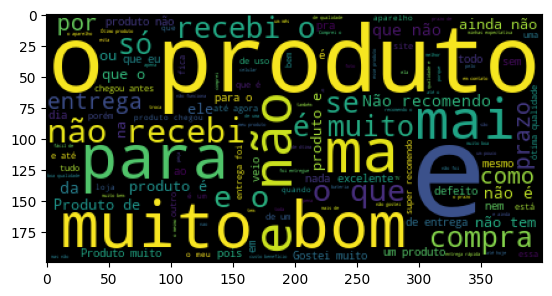

In [17]:
#Criando uma figura com matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavra)
plt.show()

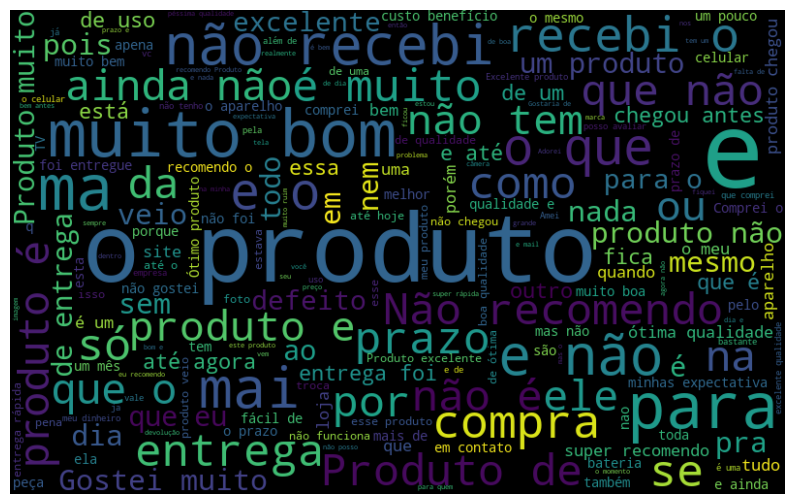

In [18]:
#melhorasno a viwe
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')#Suavia imagem "bilinear"
plt.axis('off') #remover eixos (0-350: 0-175)
plt.show()

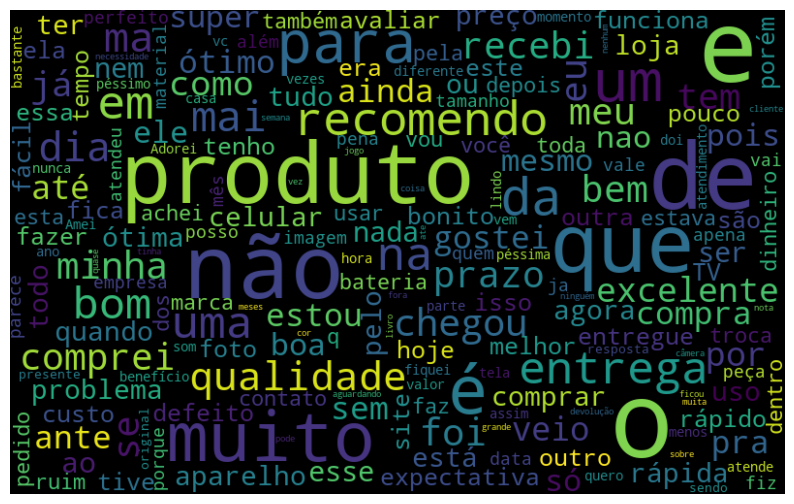

In [19]:
#TRatamento de forma individual
#melhorasno a viwe
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')#Suavia imagem "bilinear"
plt.axis('off') #remover eixos (0-350: 0-175)
plt.show()

*A imagem representa as palavras mais repetidas, no entanto e das 2 avaliações sendo as negativas e as positivas, agora separa as 2 informaçoes para ver o que mais aparece em cada tipo de avaliação*

In [20]:
#Criando função com filtro
def nuvem_palavra(texto, coluna_texto, sentimento):
    texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto] #Separando avaliações pelo sentimento
    texto_unido = ' '.join(texto_sentimento)
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
    #Uso do mesmo da fig
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')#Suavia imagem "bilinear"
    plt.axis('off') #remover eixos (0-350: 0-175)
    plt.show()

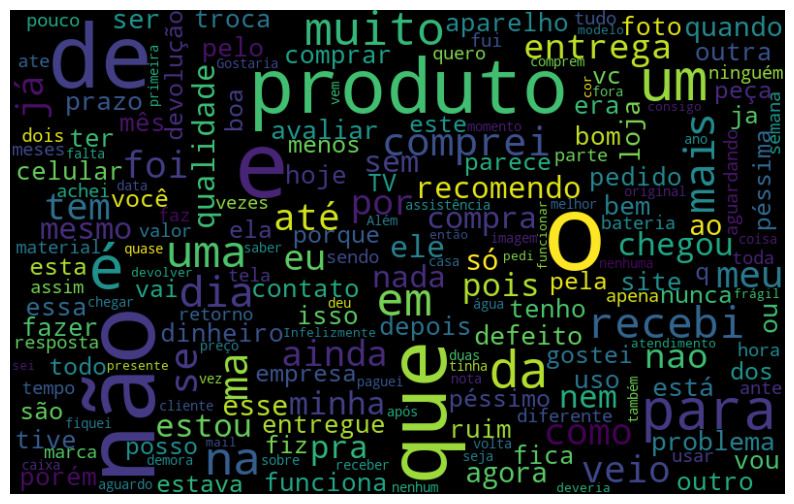

In [21]:
#Negativo - palavras sobre qualidade, comunicação e devolução
nuvem_palavra(df, "avaliacao", "negativo")

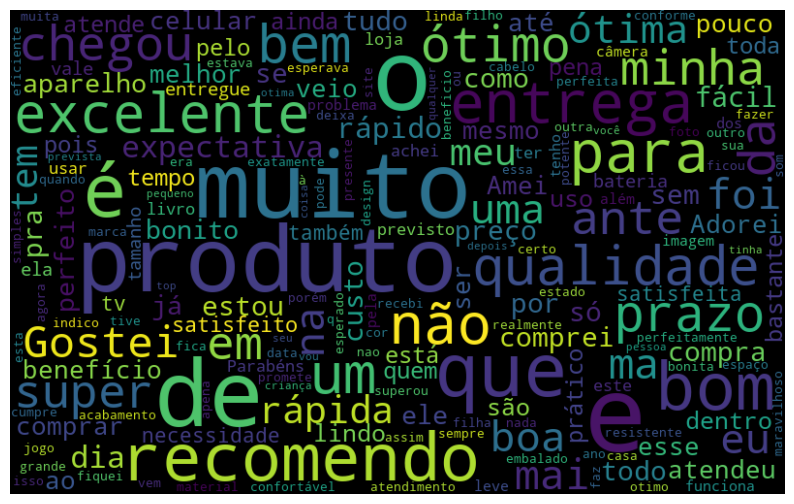

In [22]:
#positivo - produto sem excelente, entrega, recomendado, qualidade
nuvem_palavra(df, "avaliacao", "positivo")

*Frequencia de palavras* Vai ser feita a tokenização ja aplicada em outro projetos

In [23]:
#Comentei depois de rodar para visualização nao ficar muito grande no git
import nltk
#nltk.download('all')

In [24]:
frases = ['um produto bom', 'um produto ruim']
frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um produto bom': 1, 'um produto ruim': 1})

In [25]:
from nltk import tokenize
frase = 'O produto é excelente e a entrega foi muito rápida!'
#Separar quando tiver espaço, Pontuação vai ficar junto com a palavras
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['O', 'produto', 'é', 'excelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida!']


**Obtendo frequencia**

In [26]:
token_frase =token_espaco.tokenize(todas_palavras)
#token_frase #Lista muito grandecomentar para nao ter precisar ver tudo

In [27]:
#Resultado em um dicionario que vai ser passado como um DF
frequencia =nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [28]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),'Frequência': list(frequencia.values())})
df_frequencia.head(5)

Palavra  Frequência
0           Esse         101
1     smartphone          33
2        superou          90
3         minhas         533
4  expectativas,          79

In [29]:
#top 10 ordenado
df_frequencia.nlargest(columns="Frequência", n=10)

Palavra  Frequência
8          e       11813
6          o       10865
29        de       10280
19         a        8873
46       que        7657
22       não        7286
163        é        4786
63   produto        4765
177      com        4641
130       do        4583

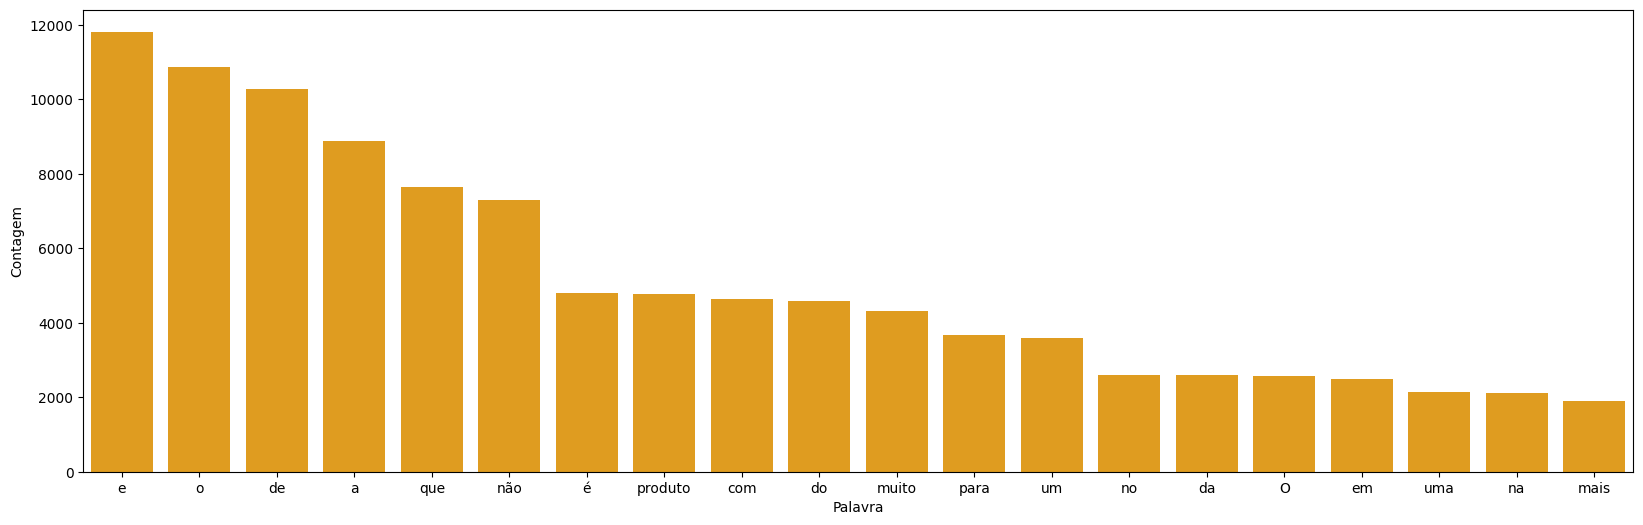

In [30]:
#grafico
import seaborn as sns

plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n=20), x='Palavra', y='Frequência', color="orange")
ax.set(ylabel='Contagem')
plt.show()

*Dados com baixo valor semantico ja que nao nos diz muita coisa então agora vou remover esses "a","e","o","de". next: Limpeza de dados*

In [31]:
#Limpeza
palavras_irrelevantes =nltk.corpus.stopwords.words('portuguese')
#palavras_irrelevantes

#lista grande exemplo

['a',

 'à',

 'ao',

 'aos',

 'aquela',

 'aquelas',...]

In [32]:
#para cada opiniao na coluna de avaliação vai tokanizar
frase_processada = []
for opiniao in df.avaliacao:
    palavras_texto= token_espaco.tokenize(opiniao)
    nova_frase=[palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes] #frase filtrada
    frase_processada.append(' '.join(nova_frase)) #Criando nova coluna para o tratamento
df['Tratamento_1'] = frase_processada
df.head(5)

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       Tratamento_1  
0   positivo    Esse smartphone superou expectativas, recomendo  
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...  
2   negativo  Eu fiz compra loja entregou produto, compra fe...  
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...  
4   positivo  Gostei muito, achei ficou desejar qualidade fo...

In [33]:
df['avaliacao'][0]

'Esse smartphone superou minhas expectativas, recomendo'

In [34]:
df['Tratamento_1'][0]

'Esse smartphone superou expectativas, recomendo'

In [35]:
#Classificação de texto
def classificar_texto(texto, coluna_texto, coluna_classificacao): #coluna_texto é onde temos avaliacao e coluna_classificacao o Tratamento_1
    vetorizar = CountVectorizer(lowercase=False, max_features=50) #nao deixa letra minusculo e deixa no max as features 50 como feito anteriormente
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto]) #dataframe e coluna de avaliacao
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=4978) #tratamento treino e teste
    regressao_logistica = LogisticRegression() #aplicando regreção logistica
    regressao_logistica.fit(X_treino, y_treino) #treino do modelo
    acuracia = regressao_logistica.score(X_teste, y_teste) #calculo da acuracia
    return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%") #retorno da acuracia coluna coluna_texto Tratamento_1

In [36]:
classificar_texto(df,"Tratamento_1", "sentimento")

Acurácia do modelo com 'Tratamento_1': 81.09%


In [37]:
#mesmo grafico feito anteriormente so que dentro de uma funççao 
def grafico_frequencia(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),"Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia, x="Palavra", y ="Frequência", color='orange')
    ax.set(ylabel="Contagem")
    plt.show()

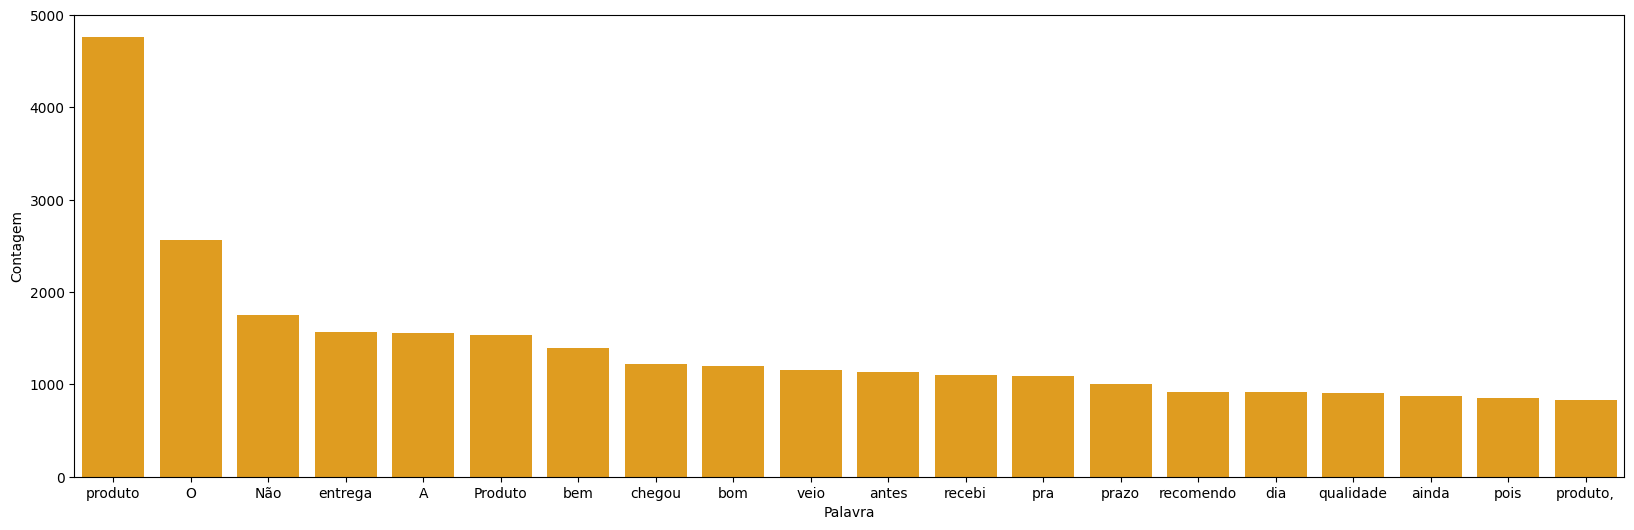

In [38]:
grafico_frequencia(df,"Tratamento_1",20)

*Remover virgulas e outras pontuação e remover o zero 0 O e A maiusculos*

In [39]:
#teste de remoção
frase = 'Esse smartphone superou expectativas, recomendo'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']


In [40]:
frase_processada = []
for opiniao in df['Tratamento_1']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase= [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))
df['Tratamento_2'] = frase_processada
df.head(5)

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       Tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        Tratamento_2  
0     Esse smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [41]:
df['Tratamento_1'][10]

'Melhor esperado, cor maravilhosa! Recomendo. Deixa ambiente moderno'

In [42]:
df['Tratamento_2'][10]

'Melhor esperado cor maravilhosa Recomendo Deixa ambiente moderno'

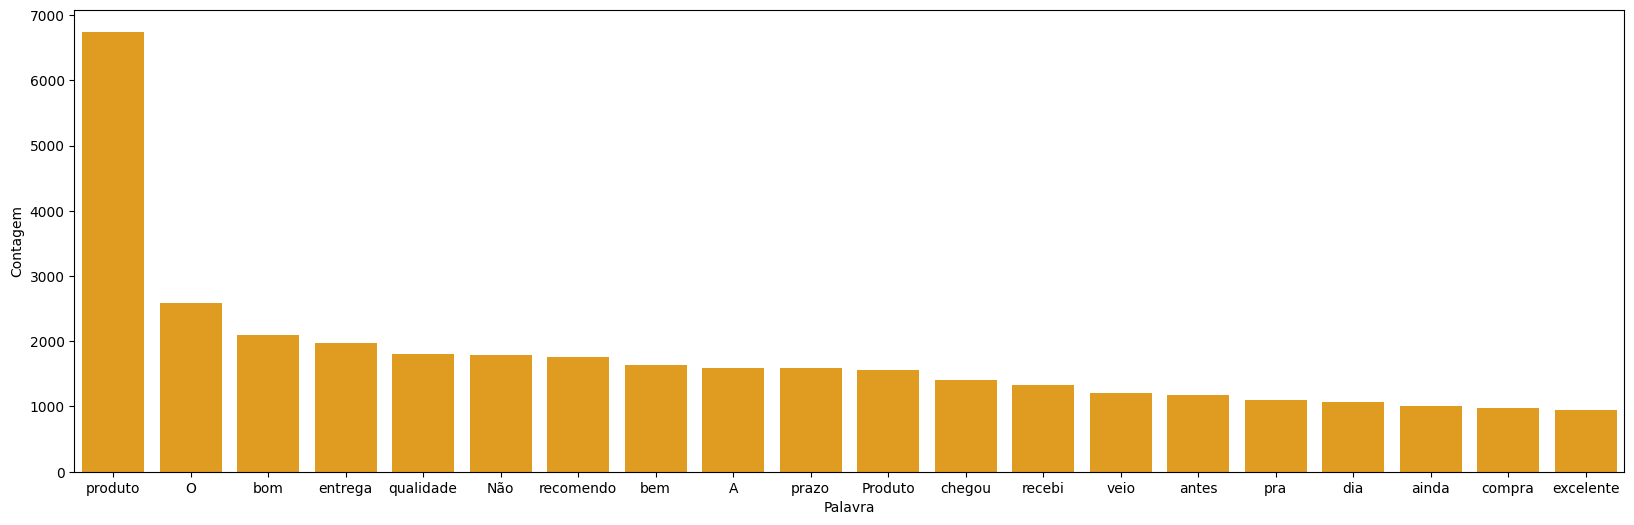

In [43]:
grafico_frequencia(df,"Tratamento_2", 20)

In [44]:
#Removendo acentos
import unidecode
frase = 'Um aparelho ótima performance preço bem menor outros aparelhos marcas conhecidas performance semelhante'
teste = unidecode.unidecode(frase)
print(teste)

Um aparelho otima performance preco bem menor outros aparelhos marcas conhecidas performance semelhante


In [45]:
sem_acentos=[unidecode.unidecode(texto) for texto in df['Tratamento_2']]
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [46]:
df['Tratamento_3'] = sem_acentos
frase_processada =[]
for opiniao in df['Tratamento_3']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase=[palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))
df['Tratamento_3'] = frase_processada
df.head(5)

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       Tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        Tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        Tratamento_3  
0     Esse smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [47]:
df['Tratamento_2'][50]

'Gosto Motorola blá blá bla blá etc etc obrigada'

In [48]:
df['Tratamento_3'][50]

'Gosto Motorola bla bla bla bla etc etc obrigada'

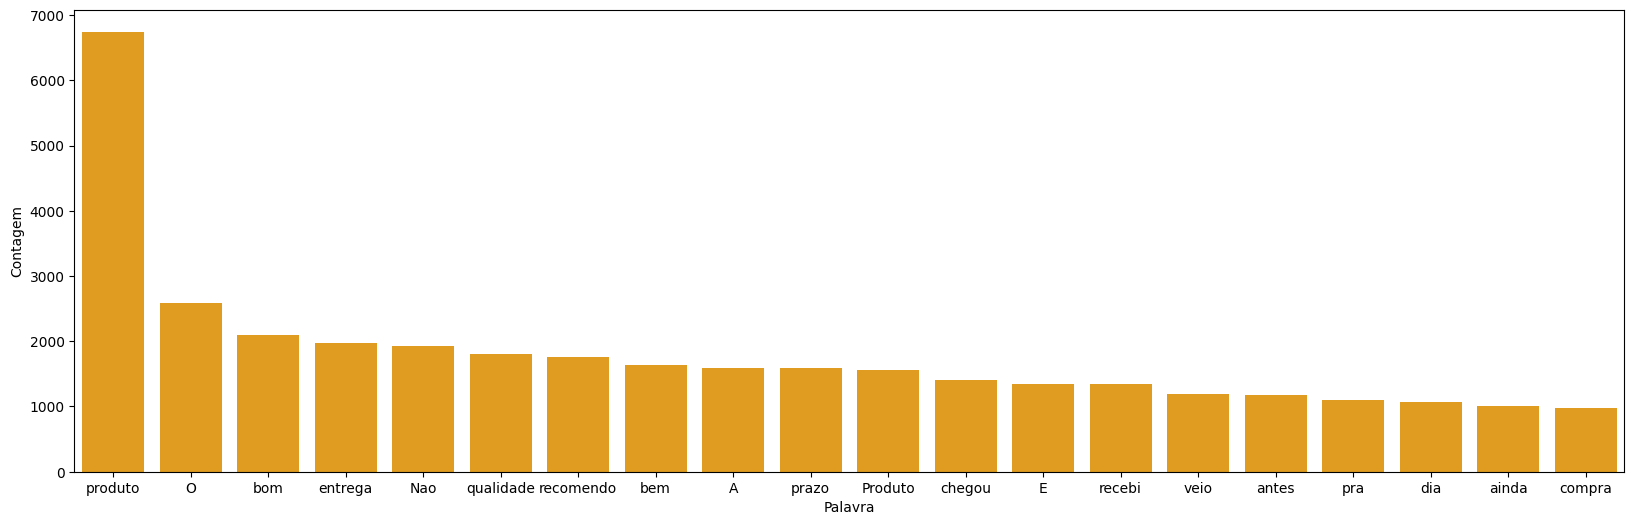

In [49]:
grafico_frequencia(df, 'Tratamento_3', 20)

**Padronizar e deixar tudo lower (letra minuscula e fazer o mesmo ate grafico e depois score pra ver a diferença)**

In [50]:
#teste
frase = "Bom produto otimo custo beneficio Recomendo Confortavel bem acabado"
print(frase.lower())

bom produto otimo custo beneficio recomendo confortavel bem acabado


In [51]:
#mesmo tratamento feito antes
frase_processada = []
for opiniao in df['Tratamento_3']:
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))
df['Tratamento_4'] = frase_processada
df.head(5)

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       Tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        Tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        Tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        Tratamento_4  
0          smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  fiz compra loja entregou produto compra feita ...  
3  atendeu expectativas achei luz ruim nada dific...  
4  gostei achei ficou desejar qualidade fotos ach...

In [52]:
df['Tratamento_3'][3]

'Atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [53]:
df['Tratamento_4'][3]

'atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [54]:
classificar_texto(df,"Tratamento_1", "sentimento")

Acurácia do modelo com 'Tratamento_1': 81.09%


In [55]:
classificar_texto(df,"Tratamento_4", "sentimento")

Acurácia do modelo com 'Tratamento_4': 83.75%


***Simplificando palavras***

In [56]:
#Teste
stemmer = nltk.RSLPStemmer()
stemmer.stem("gostaria")

'gost'

In [57]:
frase_processada = []
for opinion in df["Tratamento_4"]:
    palavras_texto = token_pontuacao.tokenize(opinion)
    nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto] #Processo de steemen pegando so o radical da palavras
    frase_processada.append(" ".join(nova_frase))
df["Tratamento_5"] = frase_processada
df.head(5)

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       Tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        Tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        Tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        Tratamento_4  \
0          smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  fiz compra loja entregou produto compra feita ...   
3  atendeu expectativas achei luz ruim nada dific...   
4  gostei achei ficou desejar qualidade fotos ach...   

                                        Tratamento_5  
0                       smartphon super expect recom  
1              cheir desagrada pra incomod recomendo  
2  fiz compr loj entreg produt compr feit carta c...  
3     atend expect ach luz ruim nad dificult funcion  
4         gost ach fic desej qual fot ach bem melhor

In [58]:
print(df["Tratamento_4"][3])

atendeu expectativas achei luz ruim nada dificulte funcionamento


In [59]:
print(df["Tratamento_5"][3])

atend expect ach luz ruim nad dificult funcion


In [60]:
classificar_texto(df, "Tratamento_4", "sentimento")

Acurácia do modelo com 'Tratamento_4': 83.75%


In [61]:
classificar_texto(df, "Tratamento_5", "sentimento")

Acurácia do modelo com 'Tratamento_5': 85.11%


***Aumentar peso de sentimento TF-IDF***

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
frases = ['Comprei um ótimo produto', 'Comprei um produto péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
matriz = tfidf.fit_transform(frases)
pd.DataFrame(matriz.todense(), columns=tfidf.get_feature_names_out())

Comprei   produto   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [63]:
tfidf_bruto = tfidf.fit_transform(df["avaliacao"])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_bruto, df["sentimento"], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_bruto = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo: {acuracia_tfidf_bruto *100:.2f}%")

Acurácia do modelo: 79.54%


In [64]:
tfidf_tratados = tfidf.fit_transform(df['Tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_tratados, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_tratados = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_tratados *100:.2f}%')

Acurácia do modelo: 85.14%


**Adicionando/captura contexto: ngrams**

In [65]:
#TEste
from nltk import ngrams
frase = 'Comprei um produto ótimo'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'produto'), ('produto', 'ótimo')]

In [66]:
#(50)
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2)) # definindo quantos ngrams queremos, teremos tantos unigrams (1) quanto bigrams (2)
vetor_tfidf = tfidf_50.fit_transform(df['Tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste) #acurácia com os n-grams:
print(f'Acurácia do modelo com 50 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 50 features e ngrams: 85.22%


In [69]:
#Aumentar as features(100)
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1,2)) # definindo quantos ngrams queremos, teremos tantos unigrams (1) quanto bigrams (2)
vetor_tfidf = tfidf_100.fit_transform(df['Tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste) #acurácia com os n-grams:
print(f'Acurácia do modelo com 100 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 100 features e ngrams: 88.26%


In [72]:
#Aumentar as features(1000)
tfidf_1000 = TfidfVectorizer(lowercase=False, ngram_range=(1,2)) # definindo quantos ngrams queremos, teremos tantos unigrams (1) quanto bigrams (2)
vetor_tfidf = tfidf_1000.fit_transform(df['Tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste) #acurácia com os n-grams:
print(f'Acurácia do modelo com 1000 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 1000 features e ngrams: 91.85%


In [71]:
#Aumentar as features (todas)
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2)) # definindo quantos ngrams queremos, teremos tantos unigrams (1) quanto bigrams (2)
vetor_tfidf = tfidf.fit_transform(df['Tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste) #acurácia com os n-grams:
print(f'Acurácia do modelo com todas features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com todas features e ngrams: 91.85%


In [73]:
vetor_tfidf.shape

(15501, 114123)

In [74]:
#Depois de rodar o 1000 novamente
pesos = pd.DataFrame(regressao_logistica.coef_[0].T, index=tfidf_1000.get_feature_names_out())

In [75]:
#dataframe com os pessos e bgrans(conjunto de palavas)
pesos.nlargest(50,0)

0
otim           9.754395
excel          8.644897
bom            7.983642
perfeit        5.868024
ador           5.447687
rap            5.170623
satisfeit      5.059817
bem            4.348323
lind           4.338409
recom          4.103507
sup            3.944899
boa            3.899843
gost           3.890964
ame            3.624926
expect         3.528176
facil          3.504546
maravilh       3.407038
ant            3.124264
bast           2.962701
bonit          2.856884
atend          2.688530
otim produt    2.601420
produt bom     2.496064
tud            2.427057
ant praz       2.289371
parab          2.288926
produt excel   2.268391
praz           2.237270
exat           2.207666
surpreend      2.195495
gost produt    2.188506
necess         2.133382
livr           2.101336
melhor         2.042688
cert           2.036177
top            1.999246
conhec         1.967229
produt otim    1.965575
tod            1.870405
cust benefici  1.856700
entreg rap     1.833232
conforta       1.815442
sup recom      1.789264
benefici       1.787735
excel produt   1.786459
obrig          1.781741
qual           1.779415
cheg ant       1.769987
bom produt     1.721090
facilit        1.710767

In [76]:
#Agora para analise negativa
pesos.nsmallest(50,0)

0
receb        -5.568090
pess         -5.424086
ruim         -4.394462
frac         -3.829498
vei          -3.545552
defeit       -3.463706
horri        -3.203625
devolv       -3.039867
dinh         -3.027681
receb produt -3.006057
fragil       -2.995043
quebr        -2.847326
pag          -2.702088
decepcion    -2.684885
nad          -2.657821
troc         -2.615714
avali        -2.572477
pess qual    -2.522049
ped          -2.474425
me           -2.452341
ning         -2.407485
compr        -2.363613
aguard       -2.357458
devoluca     -2.294064
lig          -2.267962
baix         -2.248752
aind         -2.181245
hoj          -2.161617
poi          -2.147573
tent         -2.142644
cancel       -2.106061
fot          -2.068069
fal          -2.014923
mand         -2.010131
err          -1.986796
mes          -1.983939
solt         -1.968492
funcion      -1.955954
contat       -1.953529
parec        -1.934325
diz          -1.854529
baix qual    -1.848363
dia          -1.844883
pass         -1.841926
difer        -1.774750
aind receb   -1.763067
por          -1.760395
engan        -1.757686
envi         -1.742560
retorn       -1.730812

In [77]:
#SAlvar modelo e o de regressao logistica
import joblib
joblib.dump(tfidf_1000,"tfidf_vectorizer.pkl")
joblib.dump(regressao_logistica, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

In [78]:
#Carregando os modelos [Deserização]
tfidf =joblib.load("tfidf_vectorizer.pkl")
regressao_logistica = joblib.load("modelo_regressao_logistica.pkl")

**Modificar modelos novos para utilizar tais como tratamento de acentuação, lowercase e radical e agora contruindo uma função para fazer todos esse tratamento. "Antes foi feito por etapas agora vai ser feito tudo de uma vez"**

In [ ]:
#topswords
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
token_pontuacao = tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()

def processar_avaliacao(avaliacao):
  tokens = token_pontuacao.tokenize(avaliacao)#criação do token
  frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]#Remover palavras irrelevantes filtro
  frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]#remove oq nao é alfabetico
  frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]#remover acentuação
  frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]#stemmen
  return ' '.join(frase_processada)

In [83]:
# Novas avaliações para prever
novas_avaliacoes = ["Ótimo produto, super recomendo!",
                 "A entrega atrasou muito! Estou decepcionado com a compra",
                 "Muito satisfeito com a compra. Além de ter atendido as expectativas, o preço foi ótimo",
                 "Horrível!!! O produto chegou danificado e agora estou tentando fazer a devolução.",
                 '''Rastreando o pacote, achei que não fosse recebê-lo, pois, na data prevista, estava sendo entregue em outra cidade.
                 Mas, no fim, deu tudo certo e recebi o produto.Produto de ótima qualidade, atendendo bem as minhas necessidades e por
                 um preço super em conta.Recomendo.''']

In [84]:
novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]

In [85]:
novas_avaliacoes_processadas

['otim produt sup recom',
 'entreg atras decepcion compr',
 'satisfeit compr alem ter atend expect prec otim',
 'horri produt cheg danific agor tent faz devoluca',
 'rastre pacot ach receb lo poi dat prev send entreg outr cidad fim deu tud cert receb produt produt otim qual atend bem necess prec sup cont recom']

In [86]:
#Usar no modelo
novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)
predicao = regressao_logistica.predict(novas_avaliacoes_tfidf)
df_previsoes = pd.DataFrame({"avaliacao": novas_avaliacoes,
                             "sentimento_previsto": predicao})
df_previsoes

avaliacao sentimento_previsto
0                    Ótimo produto, super recomendo!            positivo
1  A entrega atrasou muito! Estou decepcionado co...            negativo
2  Muito satisfeito com a compra. Além de ter ate...            positivo
3  Horrível!!! O produto chegou danificado e agor...            negativo
4  Rastreando o pacote, achei que não fosse receb...            positivo

***Projeto: Otimizar soluções, melhorar o relacionamento com clientes, promover melhorias nos produtos e auxiliar em campanhas de marketing.***